<h2>Python for Image Analysis</h2>

**== Imports + Display ==**

Here are a few Python libraries which can be downloaded to do basic image processing.
This is by no means an extensive list, but it is enough to get started with some basics.
Here is a link to a handbook for learning beyond this quick tutorial:
https://jakevdp.github.io/PythonDataScienceHandbook/

c:\Users\Wiseman\Documents\GitHub\Tutorial\Image_Analysis


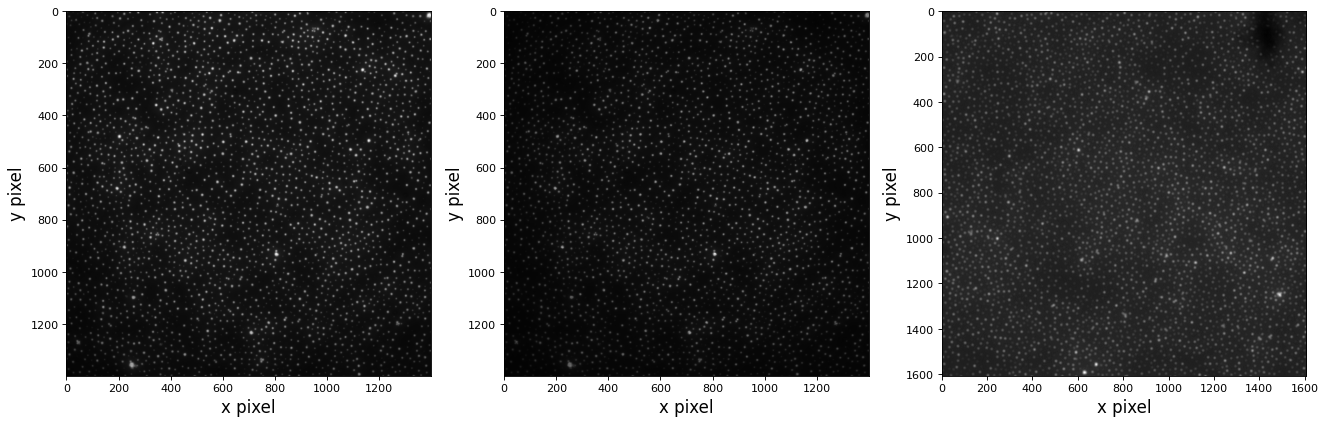

In [1]:
import numpy as np                  # This library is essential for manipulating data.
import matplotlib.pyplot as plt     # This library is essential for plotting data.
import os

# To get started, let us simply read and display out .tif file.
os.chdir(os.getcwd())
os.chdir("data")
os.chdir("2022-07-PDMS+TIRF")
test_images = [plt.imread("TIRF.tif"), plt.imread("unTIRF.tif"), plt.imread("Epi.tif")]
Num_images = len(test_images)
# Here we are telling our plotting object to make a figure with some properties.
# This object is extensive and you can check out the documentation.
fig, ax = plt.subplots(1,Num_images, figsize=(20, 10), dpi=80)
# Here we are showing our image using a grayscale colourmap. 
for i in range(Num_images):
    test_image = test_images[i]
    ax[i].imshow(test_image, cmap='gray');
    ax[i].set_xlabel("x pixel", fontsize=15)
    ax[i].set_ylabel("y pixel", fontsize=15)

**== Fourier Transformation ==**

Sometimes it is useful to do a 2D Fourier transform of your images. 
This tells us about the prominent spatial frequencies in your image. 
In this example, we can see a bright spot close to the centre.
This corresponds to high spatial frequencies needed to make sharp corners and bright pixels.

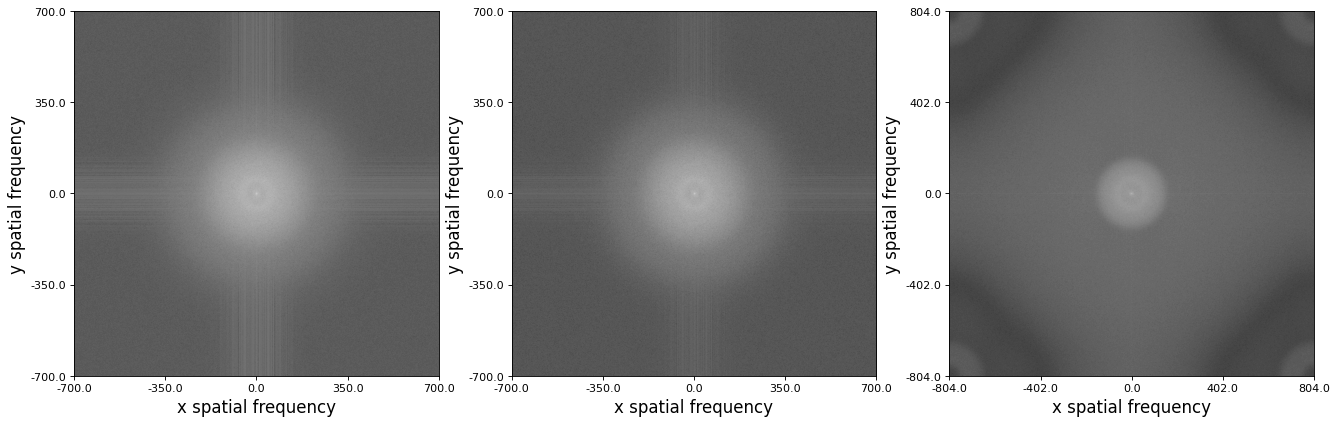

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
fig, ax = plt.subplots(1,Num_images, figsize=(20, 10), dpi=80)
for i in range(Num_images):
    test_image = test_images[i]
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(test_image))
    # Again, we can construct a figure using similar parameters.
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    alt_axis = ['-800', '-400', '0', '400', '800']
    real_axis = np.linspace(0, np.size(test_image[0,:]), len(alt_axis))
    alt_axis = real_axis - np.max(real_axis)/2
    # We take the log to make the transformed image visible with linear contrast.
    ax[i].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    # Figure manipulation in any language is usually more of an art than a science.
    # Here is what I did to change the axis labels.
    ax[i].set_xlabel("x spatial frequency", fontsize=15)
    ax[i].set_xticks(real_axis)
    ax[i].set_xticklabels(alt_axis)
    ax[i].set_ylabel("y spatial frequency", fontsize=15)
    ax[i].set_yticks(real_axis)
    ax[i].set_yticklabels(np.flip(alt_axis))

**== Intesity Histogram ==**

It can be useful to look at how data is distributed. In the example below, we visualize the distribution of intensity values across the entire image. Sometimes filtering according to an intensity threshold can be a very effective means of extracting quantitative information from images. 

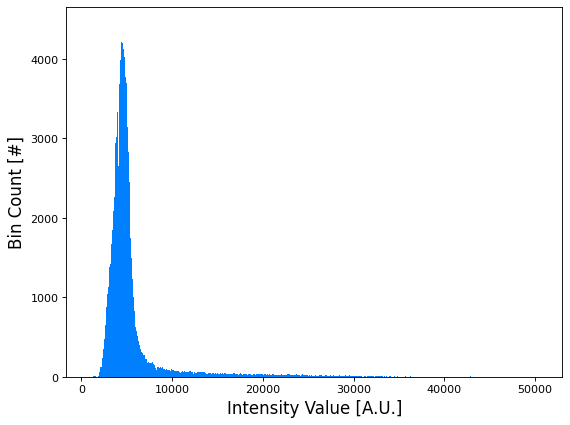

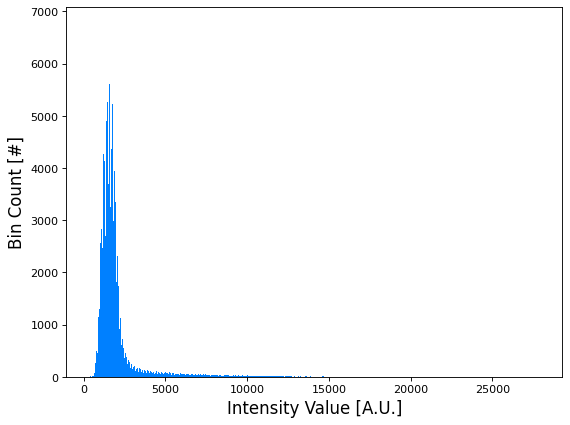

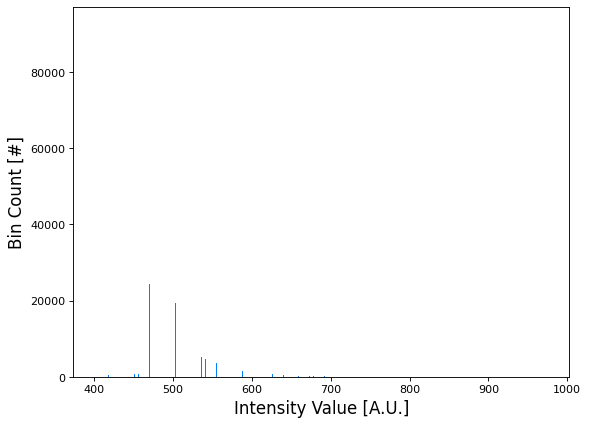

In [5]:
for i in range(Num_images):
    test_image = test_images[i]
    # Here we can "flatten" the array representing the image.
    I_vec = test_image.flatten()
    # Again, we can construct a figure using similar parameters.
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    # After we have obtained a flattened version of our image, we can make a histogram.
    dude = plt.hist(I_vec, bins=100, color=[0,0.5,1])
    plt.xlabel("Intensity Value [A.U.]", fontsize=15)
    plt.ylabel("Bin Count [#]", fontsize=15)

Text(0, 0.5, 'Bin Count [#]')

<Figure size 640x480 with 0 Axes>

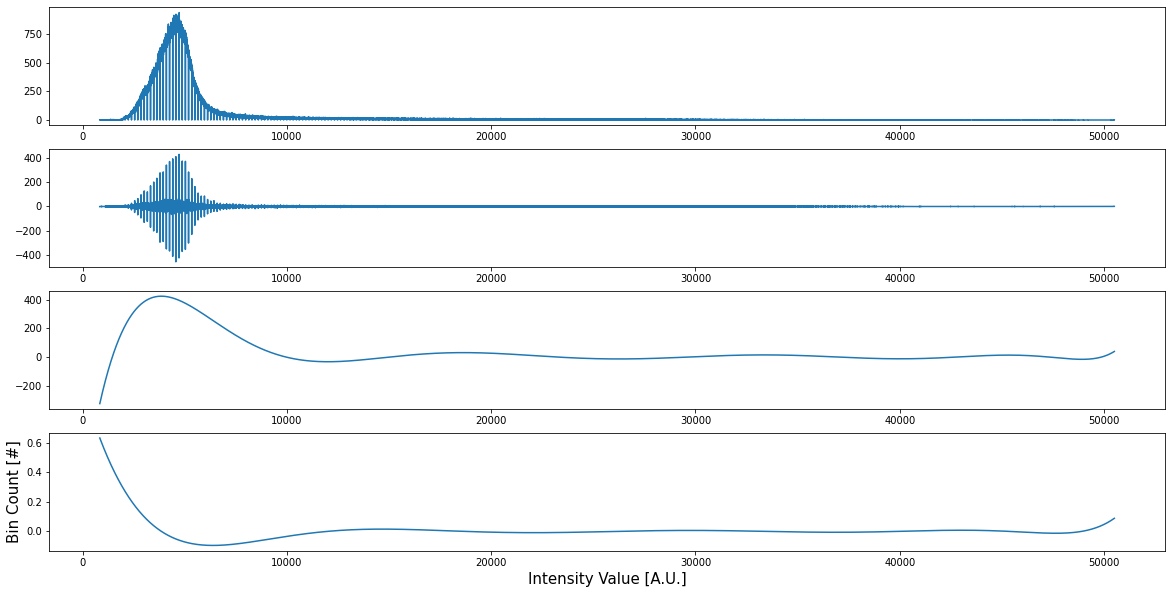

In [6]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
hist_y_axis = dude[0][0:50000]
hist_x_axis = dude[1]
x_ax_temp = np.linspace(0, 1000, num=1000)
N = 10
poly_coefs = np.polyfit(hist_x_axis[0:np.size(hist_y_axis)], hist_y_axis, deg=N)
dude2 = np.zeros(np.size(hist_y_axis))
for j in range(np.size(hist_y_axis)):
    val_j = hist_x_axis[j]
    for i in range(np.size(poly_coefs)):
        coef_i = poly_coefs[i]
        dude_curr = dude2[j]
        dude2[j] = dude_curr + coef_i*np.power(val_j, N-i)
# After we have obtained a flattened version of our image, we can make a histogram.
fig, ax = plt.subplots(4,1, figsize=(20, 10))
ax[0].plot(hist_x_axis[0:np.size(hist_y_axis)], hist_y_axis)
ax[1].plot(hist_x_axis[0:np.size(hist_y_axis)], np.gradient(hist_y_axis))
ax[2].plot(hist_x_axis[0:np.size(hist_y_axis)], dude2)
ax[3].plot(hist_x_axis[0:np.size(hist_y_axis)], np.gradient(dude2))
plt.xlabel("Intensity Value [A.U.]", fontsize=15)
plt.ylabel("Bin Count [#]", fontsize=15)

**== Profile Plots ==**

Another technique for analyzing images comes in the form of profile plots. If the optical properties of the image are not uniform across the FOV (i.e. focus drift), it might be desirable to analyze individual rows of pixels.

149.26691282361662
156.3374862944948
91.62937873874225


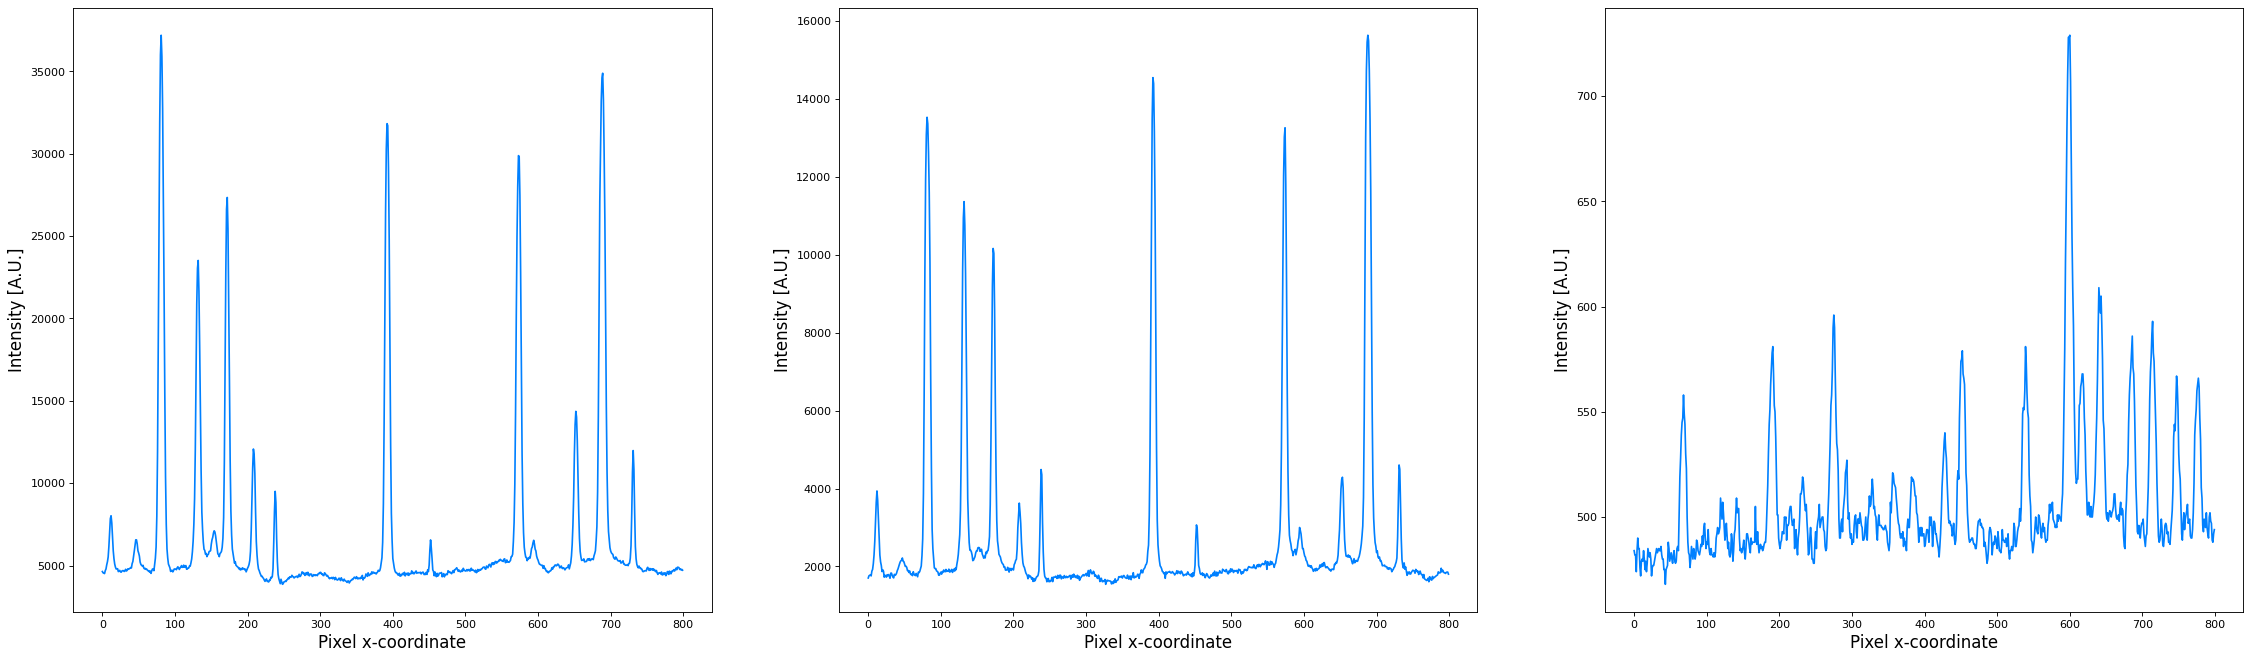

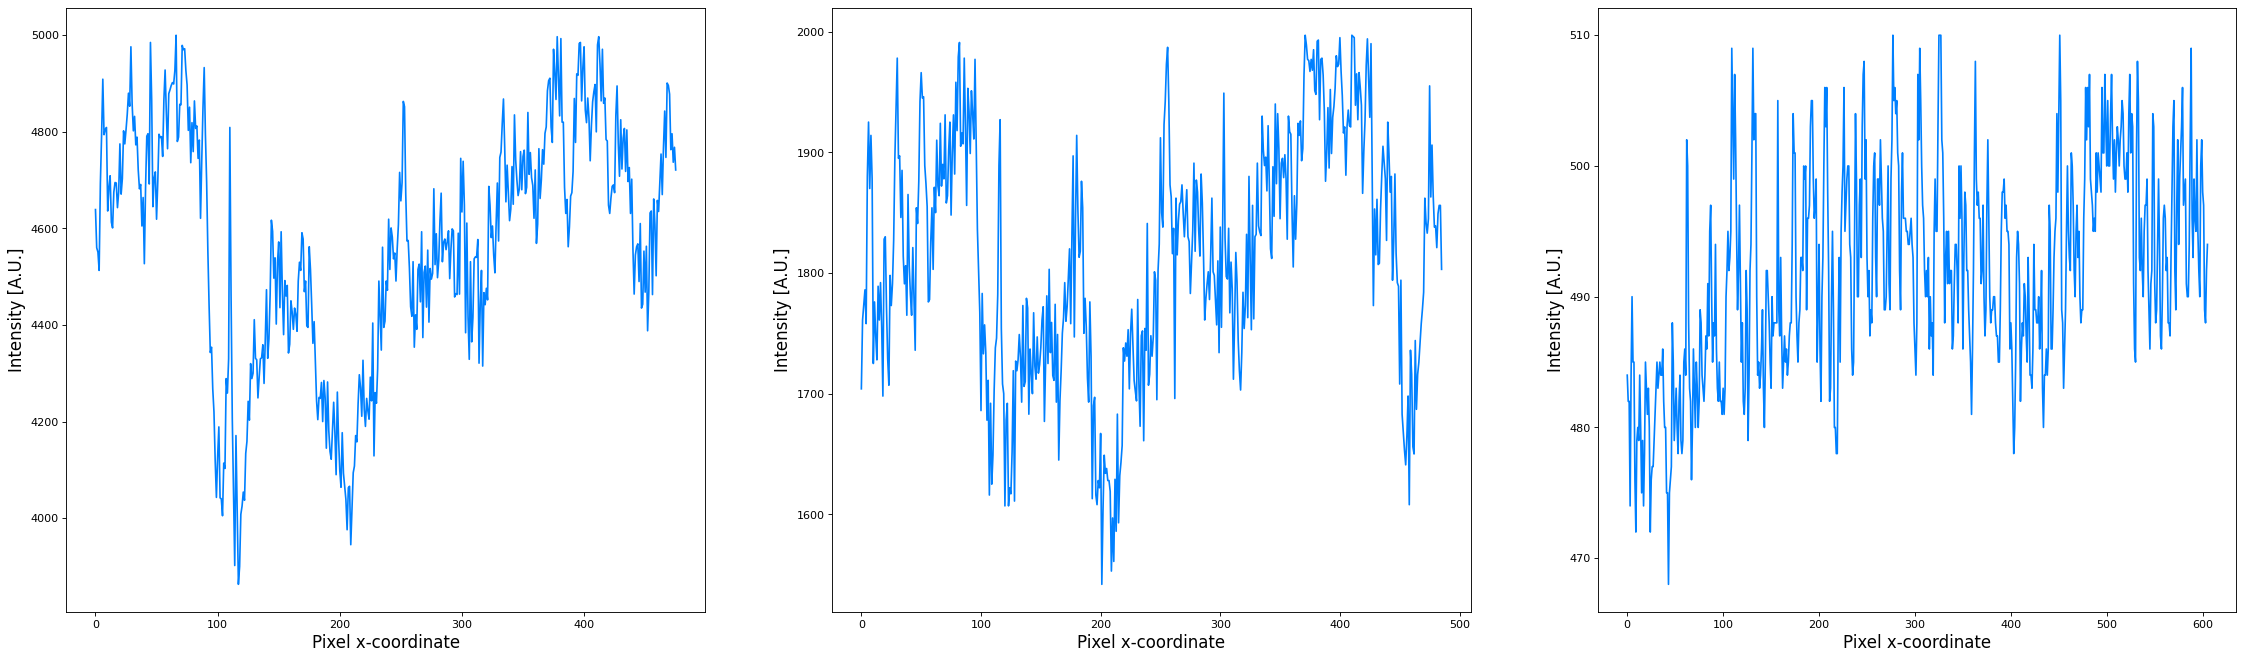

In [48]:
noise_floors = [5000, 2000, 510]
fig, ax1 = plt.subplots(1,Num_images, figsize=(35, 10), dpi=80)
fig, ax2 = plt.subplots(1,Num_images, figsize=(35, 10), dpi=80)
for i in range(Num_images):
    test_image = test_images[i]
    # Here we are picking an arbitrary slice for fitting purposes.
    # I have selected the middle row.
    arb_profile = test_image[800, 400:1200]
    prof_max = np.max(arb_profile)
    # After we have obtained a flattened version of our image, we can make a histogram.
    ax1[i].plot(arb_profile, color=[0,0.5,1])
    ax1[i].set_xlabel("Pixel x-coordinate", fontsize=15)
    ax1[i].set_ylabel("Intensity [A.U.]", fontsize=15)
    noise_inds = np.where(arb_profile <= noise_floors[i])
    noise_inds = noise_inds[0]
    arb_profile = arb_profile[noise_inds]
    prof_var = np.sqrt(np.var(arb_profile))
    print(prof_max/prof_var)
    # After we have obtained a flattened version of our image, we can make a histogram.
    ax2[i].plot(arb_profile, color=[0,0.5,1])
    ax2[i].set_xlabel("Pixel x-coordinate", fontsize=15)
    ax2[i].set_ylabel("Intensity [A.U.]", fontsize=15)

**== Next Steps ==**

Now you have some tools for visualizing your images in different ways. To quantify your images, it is important to first understand exactly what you want to quantify. In other words, what makes an image look "good". 

In the example shown in this notebook we want to compare stamped patterns to PRIMO patterns using microscopy images. A "good" pattern in this example is one that is **sharp** and **uniform**. This means that to quantify our images, we actually want to quantify "sharpness" and "uniformity".

There are lots of ways to achieve this, but a rather direct first approach could consist of the following:

1. Take profile plots of your data.
2. Attempt to fit this data to a 1-level step function.
3. Euclidean distance of this fit is related to sharpness and uniformity.

Can measures of sharpness and uniformity be extracted independently? Can you think of other ways to do this that might be more efficient than fitting a step function for each profile. **hint**: think about what you are actually doing when you fit a step function to something. 